<a href="https://colab.research.google.com/github/webrockerz2020/smart_health_assistant/blob/main/8_Predicting_and_Primitive_care.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
!pip install fuzzywuzzy

In [208]:
import pickle
import pandas as pd
from fuzzywuzzy import process

import os
#Connecting the driver
from google.colab import drive

drive.mount('/content/drive/')

root_dir = '/content/drive/MyDrive/DAP/python_scripts'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [209]:
# getting primitive care
df_primitive_care = pd.read_csv(os.path.join(root_dir,"prec_t.csv"))
diagnose_list = df_primitive_care['diagnose'].tolist()
df_primitive_care.head(3)

,did,diagnose,pid
0,1,Abdominal aortic aneurysm: (enlarged major blo...,Stopping smoking may slow their growth. Small ...
1,2,Abdominal swelling,Eating smaller meals may help prevent bloating...
2,3,Abdominal trauma,Surgery.


In [210]:
def predicting_disease(syp,diagnose_list,feature_names,loaded_model):
    #print(loaded_model)
    columns_list=feature_names.copy()
    for col in syp:
        if col not in feature_names:
            print(col)
            syp.remove(col)
    #print(syp)
    temp_df = pd.DataFrame(0, index=[0], columns=columns_list)
    temp_df.loc[0, syp] = 1
    #print(syp)
    #print(temp_df)
    predicted_class_1 ='a'
    predicted_class_1 = loaded_model.predict(temp_df)
    #print("Predicted class:", predicted_class_1)
    # getting primitive care
    predicted_class_1 = str(predicted_class_1)
    diagnose_list = [str(item) for item in diagnose_list]
    best_match, similarity_score = process.extractOne(predicted_class_1, diagnose_list)
    threshold = 70
    if similarity_score >= threshold:
        print(f"Best match for '{predicted_class_1}': '{best_match}' with similarity score: {similarity_score}")
        primitive_care= df_primitive_care[df_primitive_care['diagnose']==best_match]
        primitive_care = primitive_care['pid'].iloc[0]
        message = f"Based on the symptoms you entered, there are chances that you are suffering from **{predicted_class_1}**.\n"\
          f"\nThe primitive care we would suggest is **{primitive_care}** \nThis recommendation is based on the symptoms you provided.\n "\
        "However, please note that this is not a substitute for professional medical advice.\n We strongly recommend consulting a healthcare professional "\
          "for further clarification and a proper diagnosis.\n Your health is important, and a medical professional can provide personalized guidance and care."
        print(message)

    else:
        print(f" Diseases Predicted '{predicted_class_1}' in the is not monitored.")


# Testing using Random Forest

## Logistic Regression

In [211]:
with open(os.path.join(root_dir,'logistic_regression_model_rd.pkl'), 'rb') as file:
    loaded_model_rf = pickle.load(file)

with open(os.path.join(root_dir,'rand_for_features_lr.txt')) as file:
    lines = [line.rstrip() for line in file]

feature_names_rf = lines.copy()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.3.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [212]:
syp = ['facial paresis','muscle twitch','chill','fever','cough','decreased body weight']

In [213]:
predicting_disease(syp,diagnose_list,feature_names_rf,loaded_model_rf)

Best match for '["Alzheimer's disease"]': 'Alzheimer's disease: dementia' with similarity score: 90
Based on the symptoms you entered, there are chances that you are suffering from **["Alzheimer's disease"]**.

The primitive care we would suggest is **Rehabilitation and Occupational Therapy, Cognition-enhancing medication.** 
This recommendation is based on the symptoms you provided.
 However, please note that this is not a substitute for professional medical advice.
 We strongly recommend consulting a healthcare professional for further clarification and a proper diagnosis.
 Your health is important, and a medical professional can provide personalized guidance and care.


## Gradient Boosting

In [214]:
with open(os.path.join(root_dir,'gradient_boost_model_rd.pkl'), 'rb') as file:
    loaded_model_gb = pickle.load(file)

In [215]:
with open(os.path.join(root_dir,'rand_for_features_lr.txt')) as file:
    lines = [line.rstrip() for line in file]

In [216]:
feature_names_rf = lines.copy()

In [217]:
syp = ['facial paresis','muscle twitch','chill','fever','cough','decreased body weight']

In [218]:
predicting_disease(syp,diagnose_list,feature_names_rf,loaded_model_gb)

Best match for '["Alzheimer's disease"]': 'Alzheimer's disease: dementia' with similarity score: 90
Based on the symptoms you entered, there are chances that you are suffering from **["Alzheimer's disease"]**.

The primitive care we would suggest is **Rehabilitation and Occupational Therapy, Cognition-enhancing medication.** 
This recommendation is based on the symptoms you provided.
 However, please note that this is not a substitute for professional medical advice.
 We strongly recommend consulting a healthcare professional for further clarification and a proper diagnosis.
 Your health is important, and a medical professional can provide personalized guidance and care.


# Testing using Low Variance

## Logistic Regression

In [219]:
with open(os.path.join(root_dir,'logistic_regression_model_lv.pkl'), 'rb') as file:
    loaded_model_lv = pickle.load(file)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.3.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [220]:
with open(os.path.join(root_dir,'low_var_features_lr.txt')) as file:
    lines = [line.rstrip() for line in file]

In [221]:
feature_names_lv= lines.copy()

In [222]:
syp = ['facial paresis','muscle twitch','chill','fever','cough','decreased body weight']
predicting_disease(syp,diagnose_list,feature_names_lv,loaded_model_lv)

Best match for '["Alzheimer's disease"]': 'Alzheimer's disease: dementia' with similarity score: 90
Based on the symptoms you entered, there are chances that you are suffering from **["Alzheimer's disease"]**.

The primitive care we would suggest is **Rehabilitation and Occupational Therapy, Cognition-enhancing medication.** 
This recommendation is based on the symptoms you provided.
 However, please note that this is not a substitute for professional medical advice.
 We strongly recommend consulting a healthcare professional for further clarification and a proper diagnosis.
 Your health is important, and a medical professional can provide personalized guidance and care.


## Gradient Boosting

In [223]:
with open(os.path.join(root_dir,'gradient_boost_model_lv.pkl'), 'rb') as file:
    loaded_model_gb_lv = pickle.load(file)

In [224]:
syp = ['facial paresis','muscle twitch','chill','fever','cough','decreased body weight']
predicting_disease(syp,diagnose_list,feature_names_lv,loaded_model_gb_lv)

Best match for '["Alzheimer's disease"]': 'Alzheimer's disease: dementia' with similarity score: 90
Based on the symptoms you entered, there are chances that you are suffering from **["Alzheimer's disease"]**.

The primitive care we would suggest is **Rehabilitation and Occupational Therapy, Cognition-enhancing medication.** 
This recommendation is based on the symptoms you provided.
 However, please note that this is not a substitute for professional medical advice.
 We strongly recommend consulting a healthcare professional for further clarification and a proper diagnosis.
 Your health is important, and a medical professional can provide personalized guidance and care.


## Random Forest

In [225]:
with open(os.path.join(root_dir,'random_forest_model_lv.pkl'), 'rb') as file:
    loaded_model_rf_lv = pickle.load(file)

In [226]:
syp = ['chill','agitation','energy increased','blackout','cough']
predicting_disease(syp, diagnose_list, feature_names_lv, loaded_model_rf_lv)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Best match for '['hernia']': 'Hernia' with similarity score: 100
Based on the symptoms you entered, there are chances that you are suffering from **['hernia']**.

The primitive care we would suggest is **Supportive care: Monitoring for changes or improvement; Surgery: Laparoscopic surgery and Hernia repair; Devices: Supportive device.** 
This recommendation is based on the symptoms you provided.
 However, please note that this is not a substitute for professional medical advice.
 We strongly recommend consulting a healthcare professional for further clarification and a proper diagnosis.
 Your health is important, and a medical professional can provide personalized guidance and care.


# Support Vector Machine

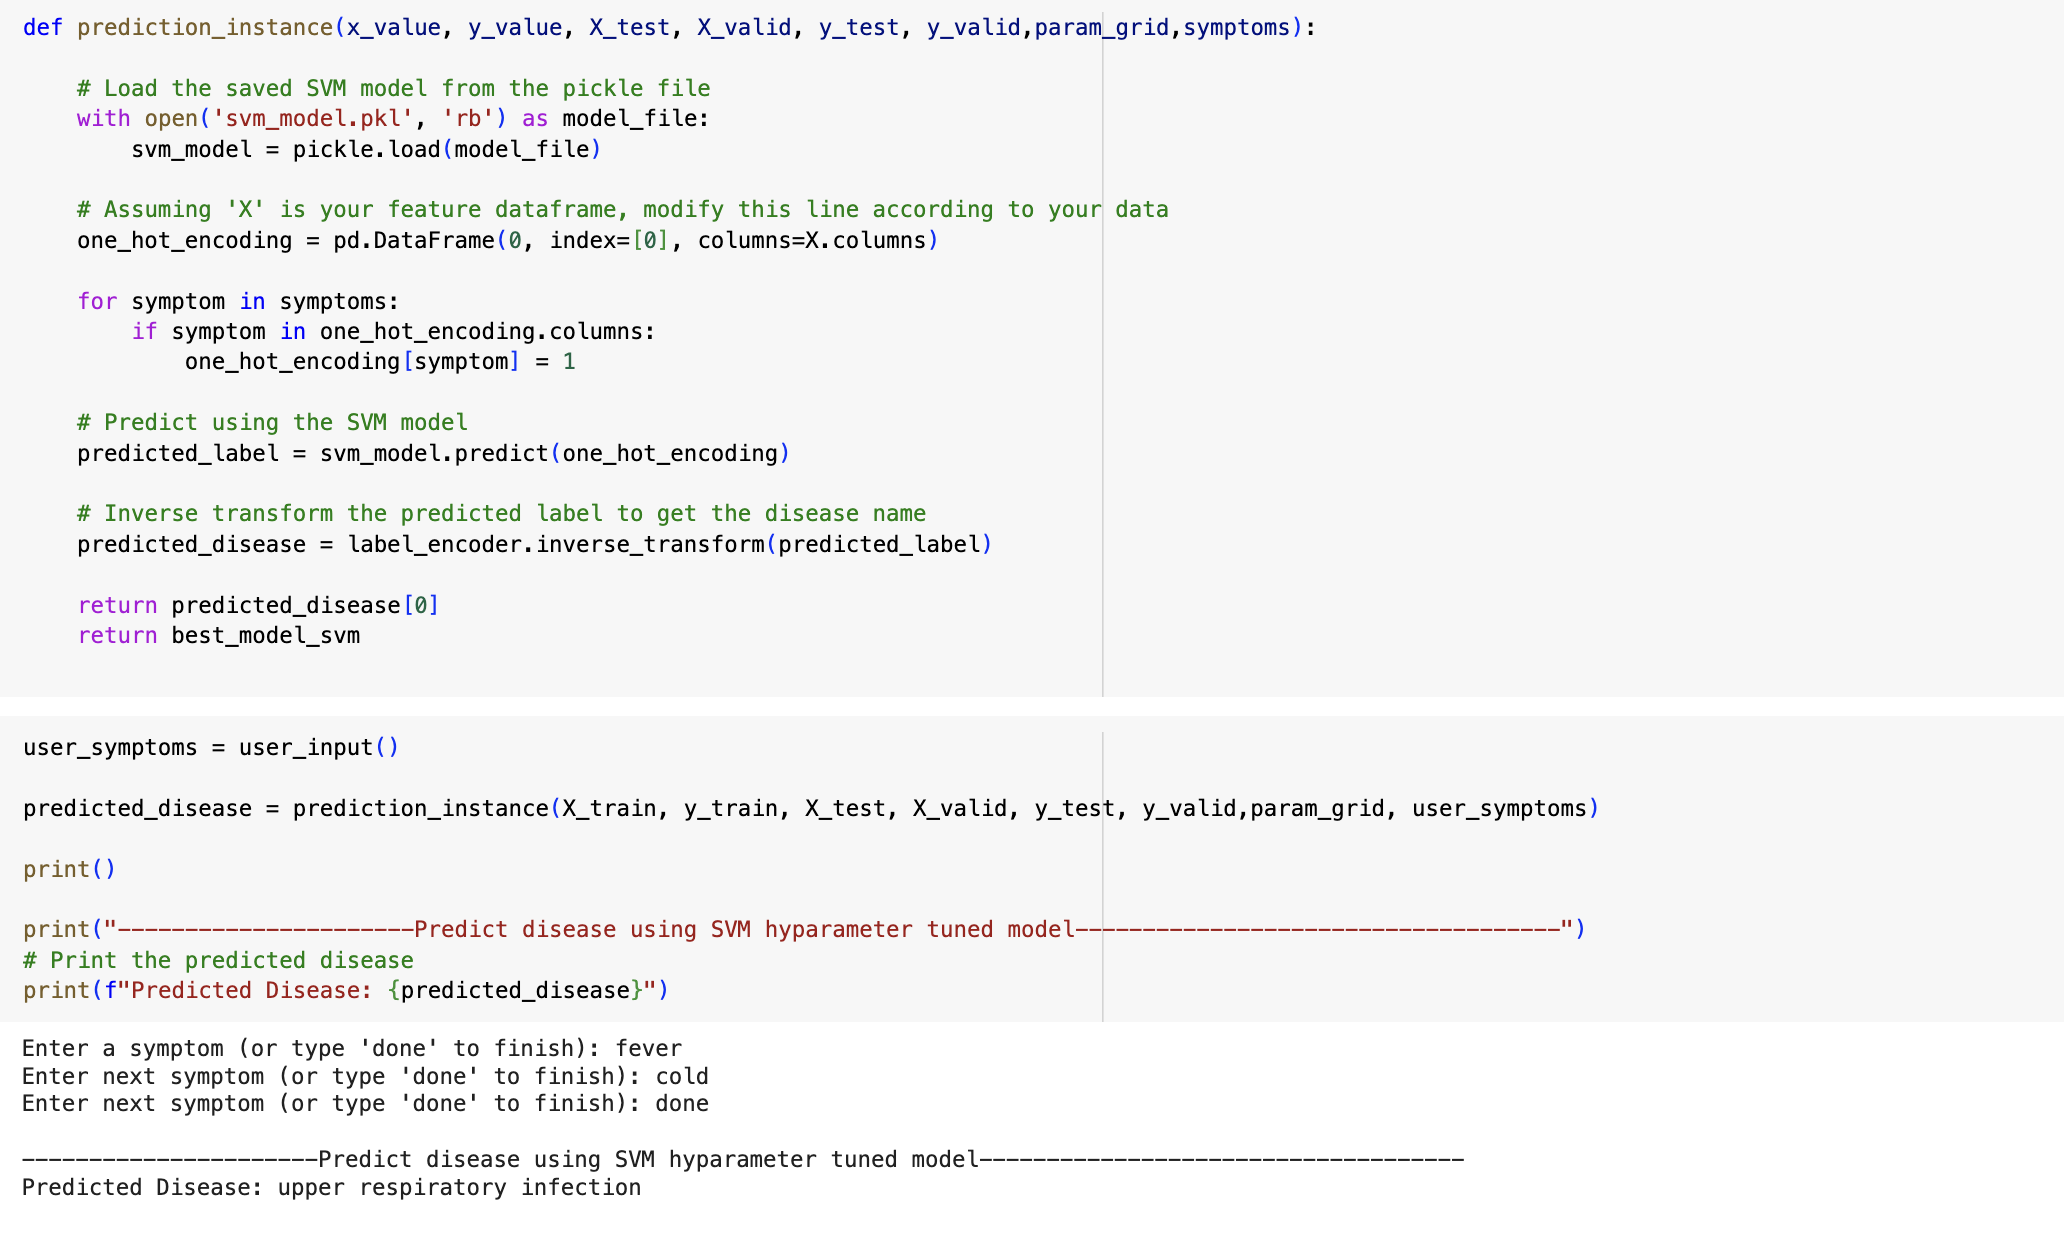

In [229]:
#present in SVM file